<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Importing-libraries-and-loading-dataset" data-toc-modified-id="Importing-libraries-and-loading-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing libraries and loading dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Model-selection-original-data" data-toc-modified-id="Model-selection-original-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model selection original data</a></span></li><li><span><a href="#Model-selection-using-LDA(dimensionality-reduction)" data-toc-modified-id="Model-selection-using-LDA(dimensionality-reduction)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model selection using LDA(dimensionality reduction)</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Introduction

Company Introduction
Your client for this project is a Smartphone Company.

They want to predict the human activity and draw other insights like signs of fatigue in an individual for fitness monitoring.
They want to monitor six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs).
One of the key measurements in this process is prediction of these six activities.

Current Scenario
The company has captured data of 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually.
Machine learning can help to study data from sensors which are already present in most smartphones and can be analysed to gain rich insights about the candidates/users.

The current scenario has the following problems :

The company has collected a large amount of sensor data from smartphones but is not able to use it efficiently.
This data can be utilized to achieve various goals that can help an individual for better health like activity detection and also monitor signs of fatigue.

The company has hired you as data science consultants to automate the process of predicting the activity and draw other insights by analyzing the smartphone sensor data.

Your Role
You are given a dataset containing the details about the participants/users.
Your task is to build a classification model for predicting the activity type.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
Deliverable: Human Activity Prediction.
Machine Learning Task: Classification
Target Variable: activity
Win Condition: N/A (best possible model)




# Data description

# Importing libraries and loading dataset

In [ ]:
!pip install -q datascience                                           # Package that is required by pandas profiling
!pip install -q pandas-profiling                                      # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 4.6 MB/s 


In [ ]:
!pip install -q --upgrade pandas-profiling                            # To upgrade pandas-profiling

     |████████████████████████████████| 261 kB 8.3 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████████████████████| 636 kB 47.2 MB/s 
     |████████████████████████████████| 10.1 MB 40.3 MB/s 
     |████████████████████████████████| 675 kB 47.2 MB/s 
     |████████████████████████████████| 3.1 MB 50.1 MB/s 
     |████████████████████████████████| 62 kB 886 kB/s 
     |████████████████████████████████| 812 kB 67.3 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                   # Importing for panel data analysis
from pandas_profiling import ProfileReport                            # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                            # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                           # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                               # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                        # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)           # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                    # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                       # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                                 # Backend used for rendering and GUI integration
import seaborn as sns                                                 # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                  # Importing train_test_split to split training and testing set 
from sklearn.preprocessing import StandardScaler                      # Importing standard scaler to perform standardization
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                       # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                     # Warnings will appear only once

In [2]:
df=pd.read_csv('hacr_train.csv')

# EDA

In [ ]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.a

In [ ]:
df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.arCoeff.Z.

In [ ]:
df.shape

(2887, 563)

In [ ]:
df.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 563 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rn                                   2887 non-null   int64  
 1   activity                             2887 non-null   object 
 2   tBodyAcc.mean.X                      2887 non-null   float64
 3   tBodyAcc.mean.Y                      2887 non-null   float64
 4   tBodyAcc.mean.Z                      2887 non-null   float64
 5   tBodyAcc.std.X                       2887 non-null   float64
 6   tBodyAcc.std.Y                       2887 non-null   float64
 7   tBodyAcc.std.Z                       2887 non-null   float64
 8   tBodyAcc.mad.X                       2887 non-null   float64
 9   tBodyAcc.mad.Y                       2887 non-null   float64
 10  tBodyAcc.mad.Z                       2887 non-null   float64
 11  tBodyAcc.max.X               

In [3]:
print('Contains Redundant Records?:', df.duplicated().any())

Contains Redundant Records?: False


In [4]:
def duplicate_cols(df):
  ls1 = []
  ls2 = []

  columns = df.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(df[columns[i]] == df[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [5]:
duplicate_cols(df)

,Feature 1,Feature 2
0,tBodyAccMag.mean,tBodyAccMag.sma
1,tBodyAccMag.mean,tGravityAccMag.mean
2,tBodyAccMag.mean,tGravityAccMag.sma
3,tBodyAccMag.std,tGravityAccMag.std
4,tBodyAccMag.mad,tGravityAccMag.mad
5,tBodyAccMag.max,tGravityAccMag.max
6,tBodyAccMag.min,tGravityAccMag.min
7,tBodyAccMag.sma,tGravityAccMag.mean
8,tBodyAccMag.sma,tGravityAccMag.sma
9,tBodyAccMag.energy,tGravityAccMag.energy


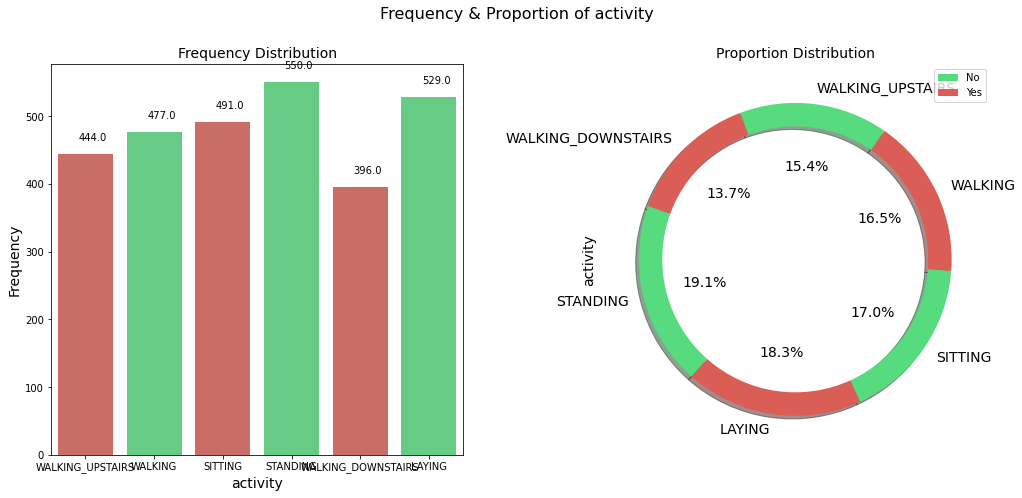

In [ ]:
fig = plt.figure(figsize = [15,10])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'activity', data = df, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'activity', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))
plt.subplot(1, 2, 2)
space = np.ones(2)/10
df['activity'].value_counts().plot(kind = 'pie',fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 7], legend = True, colors = ['#56DB7F','#DB5E56'])
plt.legend(['No', 'Yes'])
plt.ylabel(ylabel = 'activity', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of activity', y = 1.02, size = 16)
plt.show()

# Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['activity'] = lb.fit_transform(df['activity'])

In [ ]:
X = df.drop(['activity','rn'], axis=1)
y = df['activity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model selection original data

In [ ]:
# Initialize classifiers
log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1,solver='liblinear')
sv_clf = SVC(random_state=0, probability=True, class_weight='balanced')
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [ ]:
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, knn_clf]

# Create an empty list to append scores and classifier name
train_score = []
test_score = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_score.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_score.append(np.round(a=clf.score(X_test,y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!


In [ ]:
# Create a recall dataframe from recall and names list
score_frame = pd.DataFrame(data={'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier
Train Score,1.00,0.98,1.00,0.96
Test score,0.97,0.95,0.90,0.93


# Model selection using LDA(dimensionality reduction)

In [ ]:
# Performing LDA Transformation
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialize classifiers
log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1,solver='liblinear')
sv_clf = SVC(random_state=0, probability=True, class_weight='balanced')
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rf_clf= RandomForestClassifier(random_state=0, class_weight='balanced',)
gb_clf= GradientBoostingClassifier(random_state=0,)

In [ ]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, knn_clf,rf_clf,gb_clf]

# Create an empty list to append scores and classifier name
train_score = []
test_score = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train_lda, y_train)

  # Append train and test score to the empty list
  train_score.append(np.round(a=clf.score(X_train_lda, y_train), decimals=2))
  test_score.append(np.round(a=clf.score(X_test_lda,y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
CPU times: user 3.01 s, sys: 11.5 ms, total: 3.02 s
Wall time: 3.2 s


In [ ]:
# Create a recall dataframe from recall and names list
score_frame = pd.DataFrame(data={'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier
Train Score,0.99,0.99,1.00,0.99,1.00,1.00
Test score,0.97,0.97,0.96,0.98,0.97,0.96


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_lda, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# Test set prediction

In [ ]:
test=pd.read_csv('hacr_test.csv')


In [ ]:
test_copy=test.copy()

In [ ]:
test.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,tBodyAcc.correlation.X.Z,tBodyAcc.correlation.Y.Z,tGravityAcc.mean.X,tGravityAcc.mean.Y,tGravityAcc.mean.Z,tGravityAcc.std.X,tGravityAcc.std.Y,tGravityAcc.std.Z,tGravityAcc.mad.X,tGravityAcc.mad.Y,tGravityAcc.mad.Z,tGravityAcc.max.X,tGravityAcc.max.Y,tGravityAcc.max.Z,tGravityAcc.min.X,tGravityAcc.min.Y,tGravityAcc.min.Z,tGravityAcc.sma,tGravityAcc.energy.X,tGravityAcc.energy.Y,tGravityAcc.energy.Z,tGravityAcc.iqr.X,tGravityAcc.iqr.Y,tGravityAcc.iqr.Z,tGravityAcc.entropy.X,tGravityAcc.entropy.Y,tGravityAcc.entropy.Z,tGravityAcc.arCoeff.X.1,tGravityAcc.arCoeff.X.2,tGravityAcc.arCoeff.X.3,tGravityAcc.arCoeff.X.4,tGravityAcc.arCoeff.Y.1,tGravityAcc.arCoeff.Y.2,tGravityAcc.arCoeff.Y.3,tGravityAcc.arCoeff.Y.4,tGravityAcc.arCoeff.Z.1,tGravityAcc.arCoeff.Z.2,tGravityAcc.arCoeff.Z.3,tGravityAcc.arCoeff.Z.4,tGravityAcc.correlation.X.Y,tGravityAcc.correlation.X.Z,tGravityAcc.correlation.Y.Z,tBodyAccJerk.mean.X,tBodyAccJerk.mean.Y,tBodyAccJerk.mean.Z,tBodyAccJerk.std.X,tBodyAccJerk.std.Y,tBodyAccJerk.std.Z,tBodyAccJerk.mad.X,tBodyAccJerk.mad.Y,tBodyAccJerk.mad.Z,tBodyAccJerk.max.X,tBodyAccJerk.max.Y,tBodyAccJerk.max.Z,tBodyAccJerk.min.X,tBodyAccJerk.min.Y,tBodyAccJerk.min.Z,tBodyAccJerk.sma,tBodyAccJerk.energy.X,tBodyAccJerk.energy.Y,tBodyAccJerk.energy.Z,tBodyAccJerk.iqr.X,tBodyAccJerk.iqr.Y,tBodyAccJerk.iqr.Z,tBodyAccJerk.entropy.X,tBodyAccJerk.entropy.Y,tBodyAccJerk.entropy.Z,tBodyAccJerk.arCoeff.X.1,tBodyAccJerk.arCoeff.X.2,tBodyAccJerk.arCoeff.X.3,tBodyAccJerk.arCoeff.X.4,tBodyAccJerk.arCoeff.Y.1,tBodyAccJerk.arCoeff.Y.2,tBodyAccJerk.arCoeff.Y.3,tBodyAccJerk.arCoeff.Y.4,tBodyAccJerk.arCoeff.Z.1,tBodyAccJerk.arCoeff.Z.2,tBodyAccJerk.arCoeff.Z.3,tBodyAccJerk.arCoeff.Z.4,tBodyAccJerk.correlation.X.Y,tBodyAccJerk.correlation.X.Z,tBodyAccJerk.correlation.Y.Z,tBodyGyro.mean.X,tBodyGyro.mean.Y,tBodyGyro.mean.Z,tBodyGyro.std.X,tBodyGyro.std.Y,tBodyGyro.std.Z,tBodyGyro.mad.X,tBodyGyro.mad.Y,tBodyGyro.mad.Z,tBodyGyro.max.X,tBodyGyro.max.Y,tBodyGyro.max.Z,tBodyGyro.min.X,tBodyGyro.min.Y,tBodyGyro.min.Z,tBodyGyro.sma,tBodyGyro.energy.X,tBodyGyro.energy.Y,tBodyGyro.energy.Z,tBodyGyro.iqr.X,tBodyGyro.iqr.Y,tBodyGyro.iqr.Z,tBodyGyro.entropy.X,tBodyGyro.entropy.Y,tBodyGyro.entropy.Z,tBodyGyro.arCoeff.X.1,tBodyGyro.arCoeff.X.2,tBodyGyro.arCoeff.X.3,tBodyGyro.arCoeff.X.4,tBodyGyro.arCoeff.Y.1,tBodyGyro.arCoeff.Y.2,tBodyGyro.arCoeff.Y.3,tBodyGyro.arCoeff.Y.4,tBodyGyro.arCoeff.Z.1,tBodyGyro.arCoeff.Z.2,tBodyGyro.arCoeff.Z.3,tBodyGyro.arCoeff.Z.4,tBodyGyro.correlation.X.Y,tBodyGyro.correlation.X.Z,tBodyGyro.correlation.Y.Z,tBodyGyroJerk.mean.X,tBodyGyroJerk.mean.Y,tBodyGyroJerk.mean.Z,tBodyGyroJerk.std.X,tBodyGyroJerk.std.Y,tBodyGyroJerk.std.Z,tBodyGyroJerk.mad.X,tBodyGyroJerk.mad.Y,tBodyGyroJerk.mad.Z,tBodyGyroJerk.max.X,tBodyGyroJerk.max.Y,tBodyGyroJerk.max.Z,tBodyGyroJerk.min.X,tBodyGyroJerk.min.Y,tBodyGyroJerk.min.Z,tBodyGyroJerk.sma,tBodyGyroJerk.energy.X,tBodyGyroJerk.energy.Y,tBodyGyroJerk.energy.Z,tBodyGyroJerk.iqr.X,tBodyGyroJerk.iqr.Y,tBodyGyroJerk.iqr.Z,tBodyGyroJerk.entropy.X,tBodyGyroJerk.entropy.Y,tBodyGyroJerk.entropy.Z,tBodyGyroJerk.arCoeff.X.1,tBodyGyroJerk.arCoeff.X.2,tBodyGyroJerk.arCoeff.X.3,tBodyGyroJerk.arCoeff.X.4,tBodyGyroJerk.arCoeff.Y.1,tBodyGyroJerk.arCoeff.Y.2,tBodyGyroJerk.arCoeff.Y.3,tBodyGyroJerk.arCoeff.Y.4,tBodyGyroJerk.arCoeff.Z.1,tBodyGyroJerk.a

In [ ]:
test.shape

(722, 563)

In [ ]:
test.drop(columns=['rn','activity'],inplace=True)

In [ ]:
test= sc.transform(test)

In [ ]:
test = lda.transform(test)

In [ ]:
pred_y=knn.predict(test)

In [ ]:
pred_y=lb.inverse_transform(pred_y)

In [ ]:
submission = pd.DataFrame({'rn':test_copy['rn'],'activity':pred_y})

In [ ]:
submission.to_csv('submission.csv',header=False,index=False)

In [ ]:
submission.head()

,rn,activity
0,811,WALKING_DOWNSTAIRS
1,8965,WALKING
2,5000,WALKING
3,1200,SITTING
4,9812,LAYING
